# Problem Background and Motivation

Breast cancer is one of the major public health problems. Each year, approximately 1.2 million new cases of breast cancer are diagnosed and approximately 400,000 women die from it. Around 50 million women worldwide live with a previous experience of breast cancer. Approximately 200,000 deaths from breast cancer occur in developed countries and 200,000 in developing countries. <br>
We are not the only ones interested in this problem.Find some reasearch papers below: https://www.researchgate.net/publication/341508593_BREAST_CANCER_PREDICTION_USING_MACHINE_LEARNING
https://www.ijert.org/breast-cancer-detection-using-machine-learning-techniques

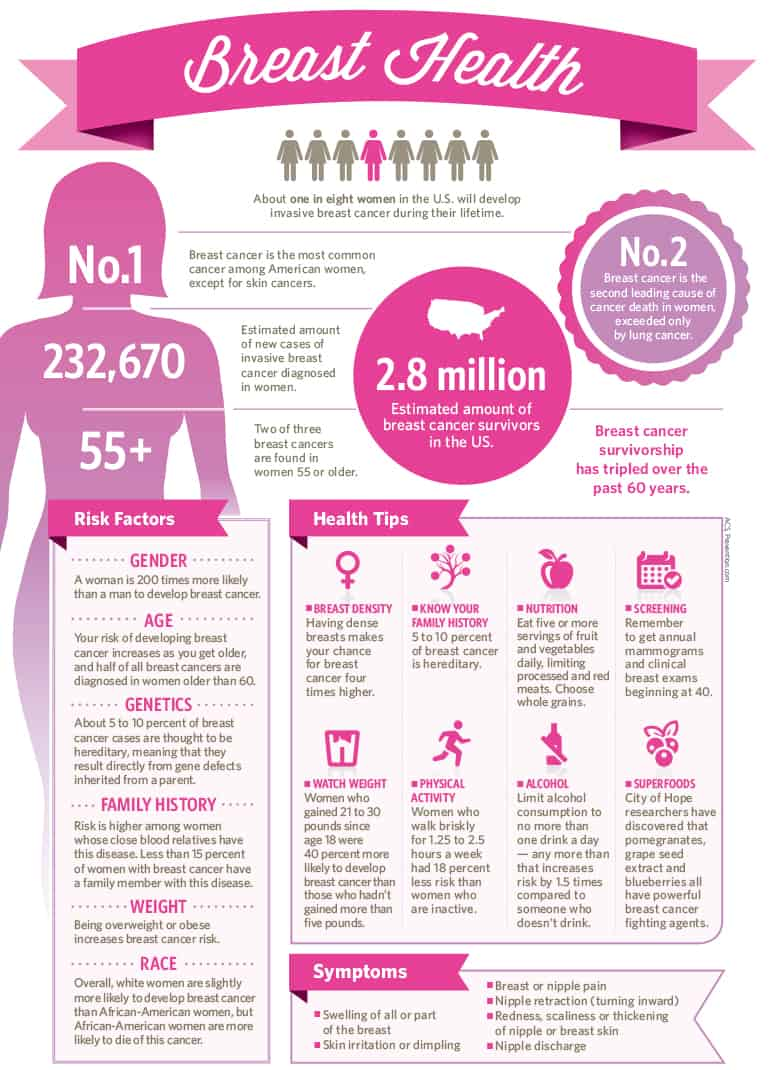

Doctors say that breast cancer happens due to abnormal growth of cells in the breast and these cells spread in size like Meta Size from the breast to the lymph nodes or also to other parts of the body. Therefore, it is necessary to detect and stop the growth of these unwanted cells as soon as possible to avoid the consequences of the next stage.<br>

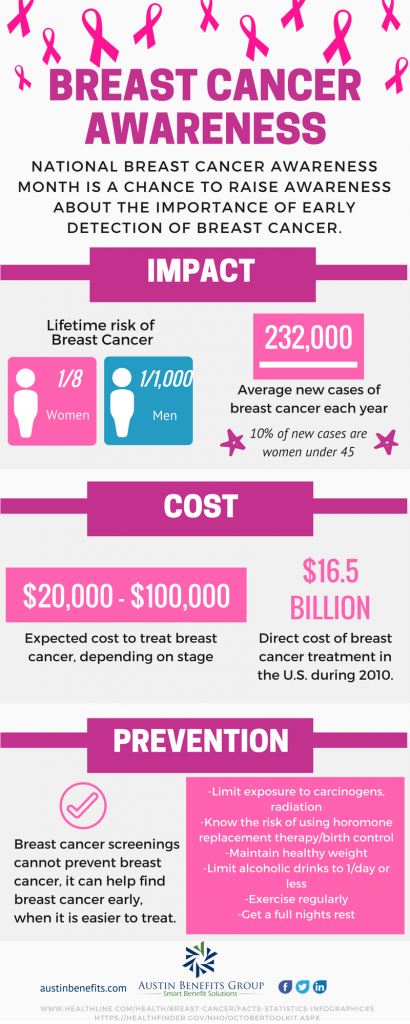

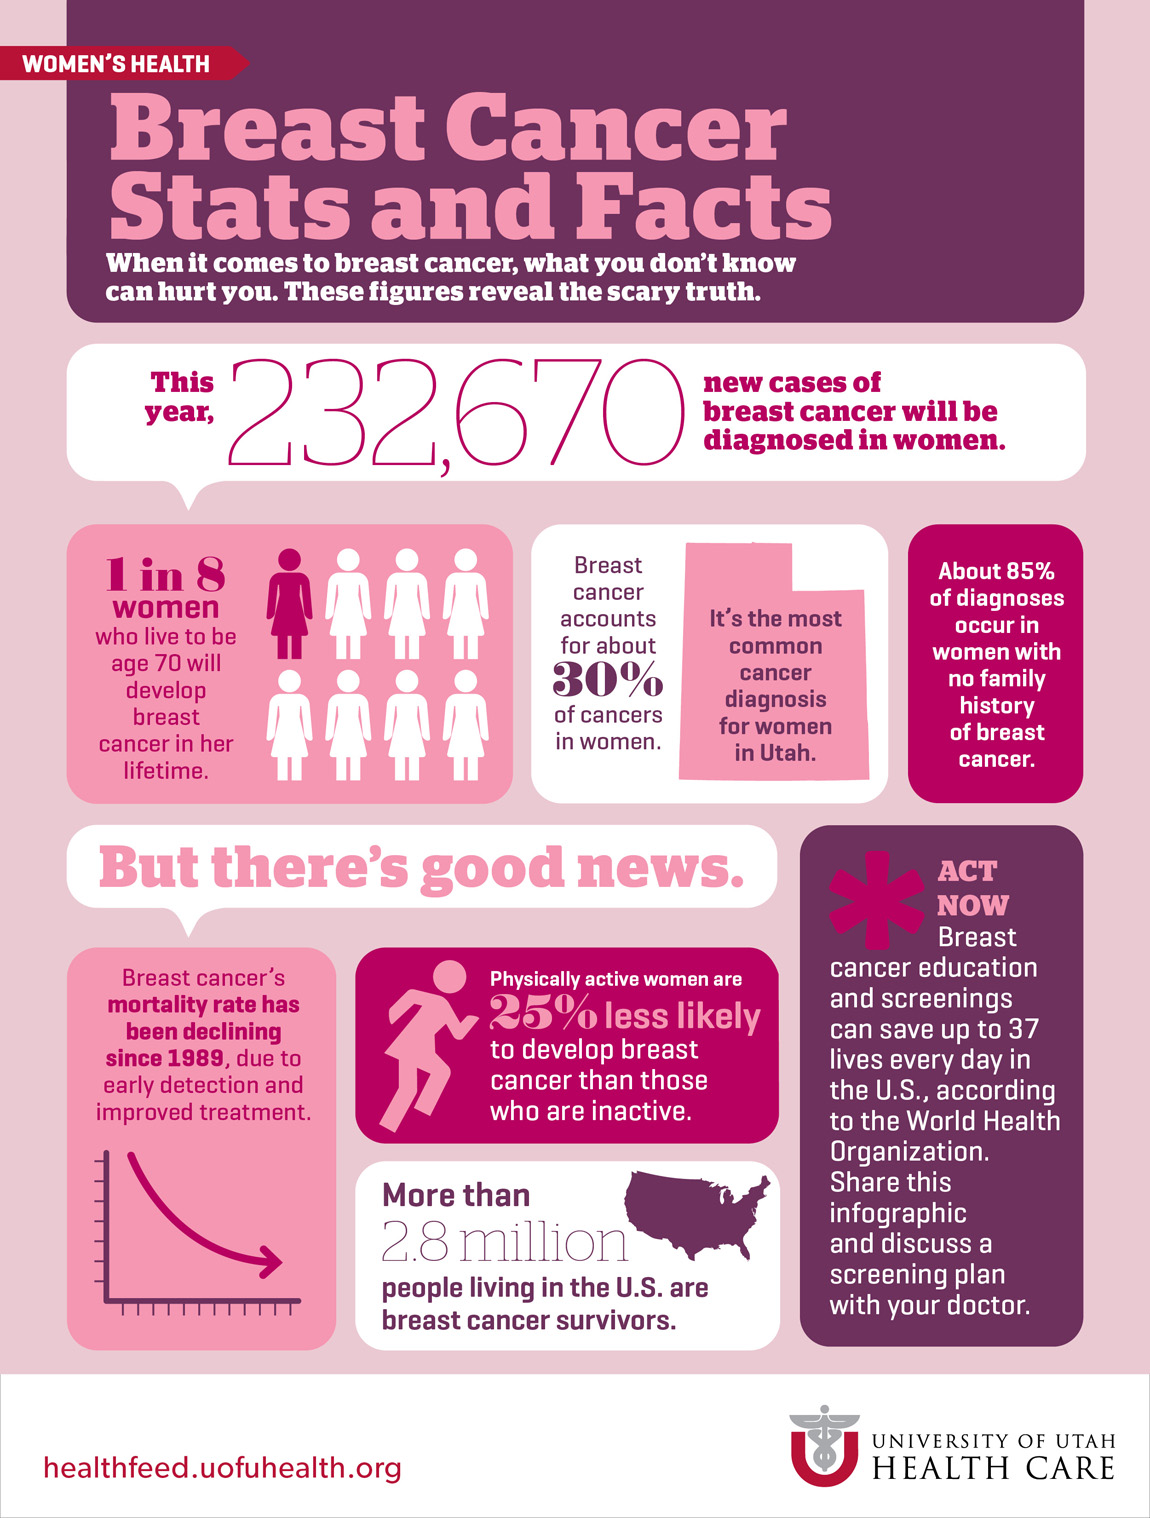

Early diagnosis of any disease is often curable with a little human effort. Most people do not discover their disease until it becomes chronic. This leads to an increase in mortality worldwide. Breast cancer is one of the diseases that can be cured if the disease is identified in the early stages before it spreads to all parts of the body.

Machine learning helps with the early diagnosis of breast cancer and determines the nature of the cancer by analyzing the size of the tumor. Machine learning methods are leading approaches to obtain favorable results between classification and prediction problems. Breast cancer research could benefit from ML techniques used to identify cancer and predict the presence or absence of tumors. Machine Learning combined with Artificial intelligence can help with the prognosis of the cancer, as well as best patient care and related steps.

This knowledge can further be used by experts in the fields to diagnose and help patients with appropriate care. Machine learning can help women around the world to do these tests and take the required action on time. 
The reliability of the Machine learning model cannot be defined as of now, but there are researchers and experts working in this field to optimize and find a solution. This will help not with Women and Men around the global to receive better healthcare and subside the impact of breast cancer.
<br>

>**What is the problem we are trying to solve?**<br>
>We want to better understand which property characteristics are most predictive of listing prices<br><br>
>**Why is it important?  Who cares?**<br>
>Real-estate investors would probably care - there's a lot of competition for rentals and they would probably benefit from some data analysis that would help them know where to focus their attention<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>Property owners might change how the manage existing properities.  New investors might use our analysis to decide which properties to buy<br><br>
>**Who are the key stakeholders?**<br>
>Property owners, real estate investors<br><br>

# Import Package Dependencies
<br>

### Libraries<br>

>**Pandas:**<br>
We alias this as 'pd' and use it to... <br>

>**SKLearn:**<br>
The premier ML library.  Here we are using it to...  <br>
LogisticRegression function to do... <br>
accuracy_score function is used to...            <br>

>**Pickle:**<br>
We use this library to translate our Python code into a 'serialized' form...<br>
thus making it accessible and  easier to work with in deployment

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [4]:
df = pd.read_csv('winequality-white.csv')

In [ ]:
X = df.iloc[:,1:len(df.columns)]
y = df.iloc[:,0]

In [5]:
model = LogisticRegression(max_iter=800)
model.fit(X,y)

predictions = model.predict(X)
print(accuracy_score(y,predictions))


0.8025724785626787


In [ ]:
pickle_out = open('classifier', mode='wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [6]:
%%writefile app.py

import pickle
import streamlit as st

pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

# Define the function which will make the prediction using data
# inputs from users
def prediction(chlorides, total_sulfur_dioxide,
               density, pH, alcohol):
    
    # Make predictions
    prediction = classifier.predict(
        [[chlorides, total_sulfur_dioxide,
               density, pH, alcohol]])
    
    if prediction == 0:
        pred = 'The Wine quality is probably bad'
    else:
        pred = 'Wow!! Amazing Quality. Taste it!'
    return pred

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    chlorides = st.number_input("Chloride Content(<1)",
                                  min_value=0,
                                  max_value=20,
                                  value=4,
                                  step=1,
                                 )
    total_sulfur_dioxide = st.number_input("Sulfur DiOxide Levels",
                              min_value=0,
                              max_value=200,
                              value=120,
                              step=10
                             )

    density = st.number_input("Density Level",
                              min_value=0,
                              max_value=850,
                              value=80,
                              step=20
                             )
    pH = st.number_input("PH levels",
                          min_value=0,
                          max_value=70,
                          value=32,
                          step=1
                         )
    alcohol = st.number_input("Alcohol Contained",
                          min_value=0,
                          max_value=120,
                          value=33,
                          step=1
                         )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(chlorides, total_sulfur_dioxide,
               density, pH, alcohol)
        st.success(result)
        
if __name__=='__main__':
    main()
    

Overwriting app.py


In [2]:
!streamlit run app.py

'streamlit' is not recognized as an internal or external command,
operable program or batch file.
